In [ ]:
# !pip install minisom


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


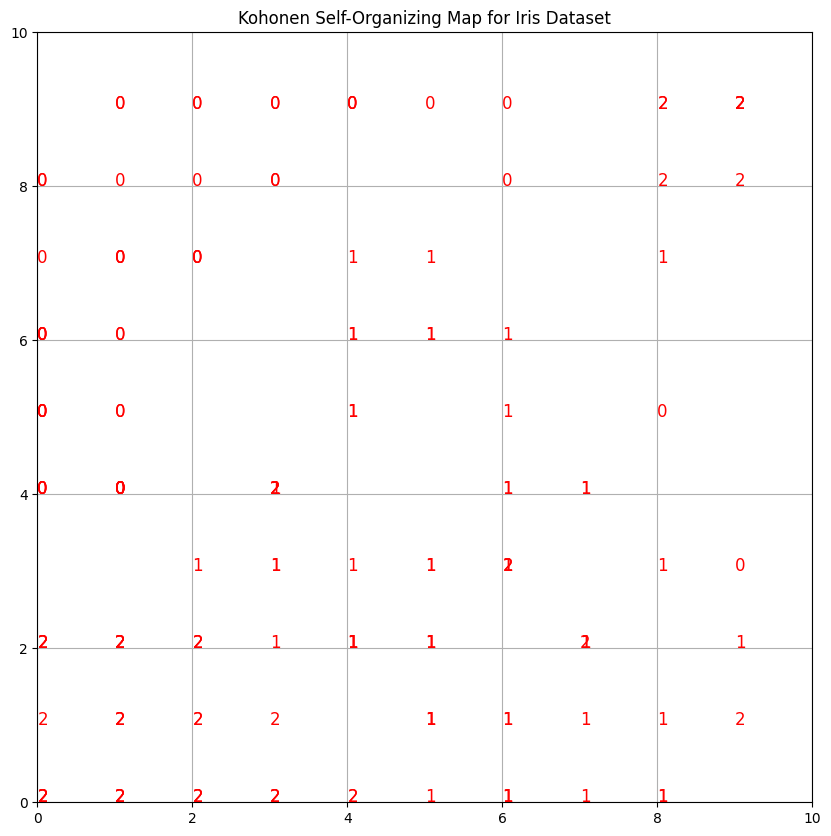

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

# Load dataset (Iris dataset)
iris = load_iris()
data = iris.data  # Features
labels = iris.target  # Target classes

# Normalize data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Initialize Kohonen SOM
som_size = (10, 10)  # Grid size (10x10)
som = MiniSom(som_size[0], som_size[1], data.shape[1], sigma=1.0, learning_rate=0.5)

# Random weight initialization
som.random_weights_init(data)

# Train the SOM
som.train_random(data, 1000)  # 1000 iterations

# Visualizing the SOM
plt.figure(figsize=(10, 10))
for i, x in enumerate(data):
    w = som.winner(x)  # Best matching unit
    plt.text(w[0], w[1], str(labels[i]), color='red', fontsize=12)

plt.title("Kohonen Self-Organizing Map for Iris Dataset")
plt.xlim([0, som_size[0]])
plt.ylim([0, som_size[1]])
plt.grid()
plt.show()


# Kohonen Algorithm [Raw Code]

SOM Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



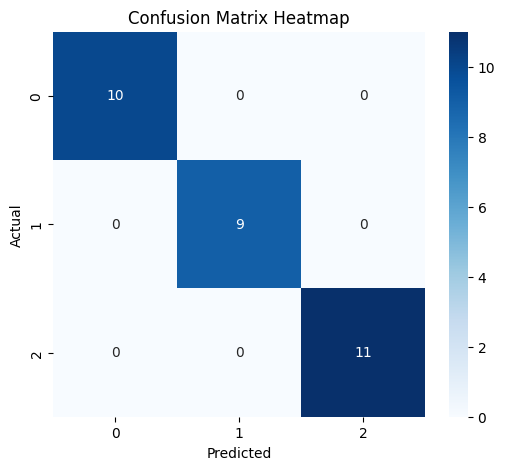

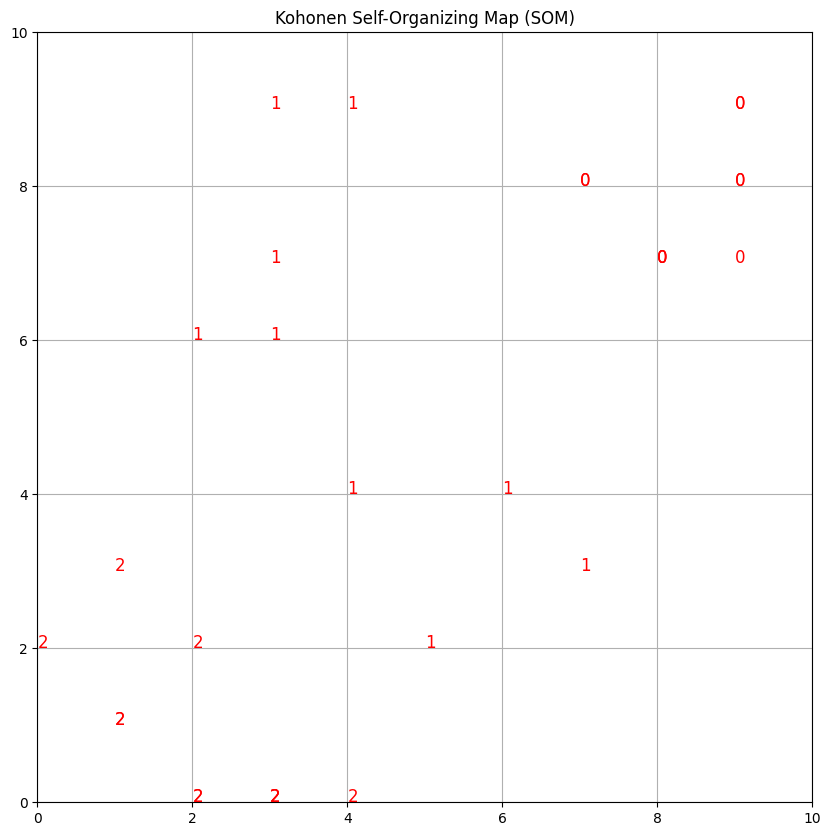

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

class KohonenSOM:
    def __init__(self, grid_size=(10, 10), learning_rate=0.5, sigma=2.0, epochs=1000):
        self.grid_size = grid_size
        self.learning_rate = learning_rate
        self.sigma = sigma
        self.epochs = epochs
        self.weights = None
        self.input_dim = None
        self.train_data = None
        self.train_labels = None

    def _euclidean_distance(self, x, w):
        return np.sqrt(np.sum((x - w) ** 2, axis=-1))

    def _find_bmu(self, sample):
        distances = self._euclidean_distance(sample, self.weights)
        return np.unravel_index(np.argmin(distances), distances.shape)

    def _get_neighborhood(self, center, radius):
        x, y = np.meshgrid(np.arange(self.grid_size[0]), np.arange(self.grid_size[1]))
        dist = np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2)
        return np.exp(-dist ** 2 / (2 * radius ** 2))

    def fit(self, data, labels):
        self.input_dim = data.shape[1]
        self.weights = np.random.rand(self.grid_size[0], self.grid_size[1], self.input_dim)
        self.train_data = data
        self.train_labels = labels
        lr = self.learning_rate
        sigma = self.sigma

        for epoch in range(self.epochs):
            sample = data[np.random.randint(0, len(data))]
            bmu = self._find_bmu(sample)
            neighborhood = self._get_neighborhood(bmu, sigma)

            for i in range(self.grid_size[0]):
                for j in range(self.grid_size[1]):
                    self.weights[i, j] += lr * neighborhood[i, j] * (sample - self.weights[i, j])

            lr *= 0.99
            sigma *= 0.99

    def predict(self, test_data):
        predictions = []
        for x in test_data:
            bmu = self._find_bmu(x)
            closest_idx = np.argmin(self._euclidean_distance(x, self.train_data))
            predictions.append(self.train_labels[closest_idx])
        return predictions

    def evaluate(self, test_data, test_labels):
        predictions = self.predict(test_data)
        accuracy = accuracy_score(test_labels, predictions)
        print(f"SOM Accuracy: {accuracy * 100:.2f}%")
        print("Classification Report:")
        print(classification_report(test_labels, predictions))
        cm = confusion_matrix(test_labels, predictions)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=np.unique(test_labels),
                    yticklabels=np.unique(test_labels))
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix Heatmap")
        plt.show()
        return predictions

    def visualize(self, test_data, test_labels):
        plt.figure(figsize=(10, 10))
        for i, x in enumerate(test_data):
            w = self._find_bmu(x)
            plt.text(w[0], w[1], str(test_labels[i]), color='red', fontsize=12)
        plt.title("Kohonen Self-Organizing Map (SOM)")
        plt.xlim([0, self.grid_size[0]])
        plt.ylim([0, self.grid_size[1]])
        plt.grid()
        plt.show()

# Example usage
if __name__ == "__main__":
    iris = load_iris()
    data = iris.data
    labels = iris.target

    scaler = MinMaxScaler()
    data = scaler.fit_transform(data)

    train_data, test_data, train_labels, test_labels = train_test_split(
        data, labels, test_size=0.2, random_state=42)

    som = KohonenSOM(grid_size=(10, 10), learning_rate=0.5, sigma=2.0, epochs=1000)
    som.fit(train_data, train_labels)
    som.evaluate(test_data, test_labels)
    som.visualize(test_data, test_labels)


# Hoffman Algorithm [Raw Code]

In [18]:
import numpy as np

def sign(x):
    return np.where(x >= 0, 1, -1)

class HopfieldNetwork:
    def __init__(self, num_nodes):
        self.num_nodes = num_nodes
        self.weights = np.zeros((num_nodes, num_nodes))

    def train(self, patterns):
        for pattern in patterns:
            pattern = pattern.reshape(-1, 1)
            self.weights += pattern @ pattern.T
        np.fill_diagonal(self.weights, 0)

    def recall(self, pattern, max_iterations=10):
        state = pattern.copy()
        for _ in range(max_iterations):
            new_state = sign(self.weights @ state)
            if np.array_equal(new_state, state):
                break
            state = new_state
        return state

    def accuracy(self, test_patterns, original_patterns):
        correct = 0
        for test, original in zip(test_patterns, original_patterns):
            recalled = self.recall(test)
            if np.array_equal(recalled, original):
                correct += 1
        return correct / len(test_patterns)

# Generate binary patterns (+1/-1)
def generate_binary_patterns(n_patterns, n_bits):
    return np.random.choice([-1, 1], size=(n_patterns, n_bits))

# Apply noise by flipping a few bits
def add_noise_to_patterns(patterns, flip_count):
    noisy_patterns = patterns.copy()
    for pattern in noisy_patterns:
        flip_indices = np.random.choice(len(pattern), flip_count, replace=False)
        pattern[flip_indices] *= -1
    return noisy_patterns

# Main flow
if __name__ == "__main__":
    num_bits = 64
    num_patterns = 8  # Keep <= 0.15 * num_bits

    # Generate and train
    patterns = generate_binary_patterns(num_patterns, num_bits)
    hopfield = HopfieldNetwork(num_nodes=num_bits)
    hopfield.train(patterns)

    # Create noisy versions (flip 5% bits)
    noisy_patterns = add_noise_to_patterns(patterns, flip_count=int(0.05 * num_bits))

    # Test and evaluate
    accuracy = hopfield.accuracy(noisy_patterns, patterns)
    print(f"Reconstruction Accuracy: {accuracy * 100:.2f}%")
    


Reconstruction Accuracy: 100.00%


Classification Report:
              precision  recall  f1-score  support
0                 1.000   1.000     1.000      1.0
1                 1.000   1.000     1.000      1.0
2                 1.000   1.000     1.000      1.0
3                 1.000   1.000     1.000      1.0
4                 1.000   1.000     1.000      1.0
5                 1.000   1.000     1.000      1.0
6                 1.000   1.000     1.000      1.0
7                 0.000   0.000     0.000      0.0
accuracy          1.000   1.000     1.000      1.0
macro avg         0.875   0.875     0.875      7.0
weighted avg      1.000   1.000     1.000      7.0


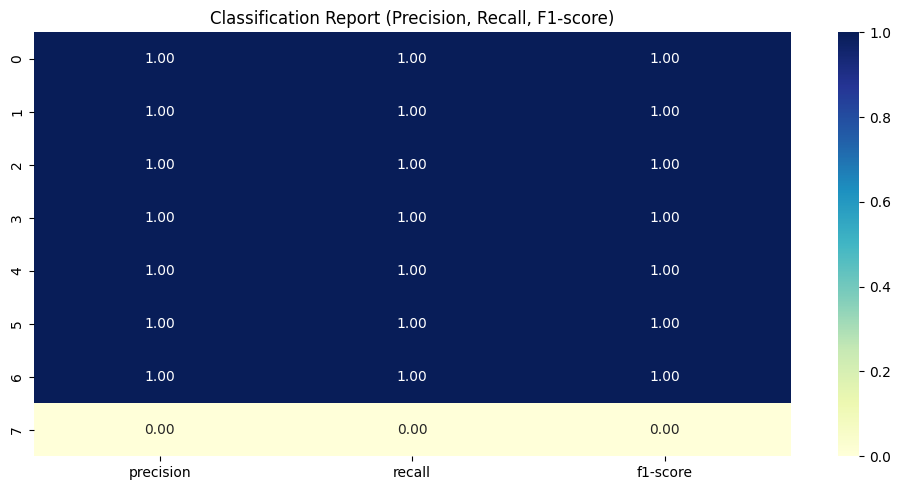

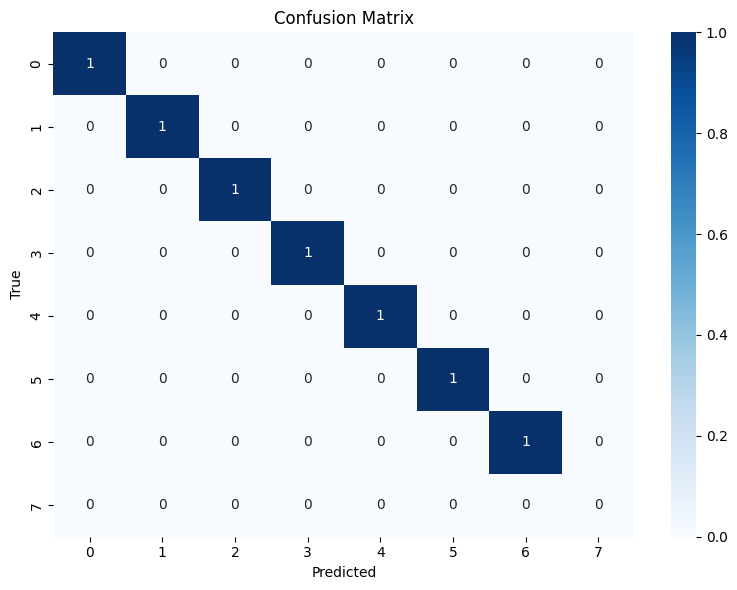

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

def sign(x):
    return np.where(x >= 0, 1, -1)

class HopfieldNetwork:
    def __init__(self, num_nodes):
        self.num_nodes = num_nodes
        self.weights = np.zeros((num_nodes, num_nodes))

    def train(self, patterns):
        for pattern in patterns:
            pattern = pattern.reshape(-1, 1)
            self.weights += pattern @ pattern.T
        np.fill_diagonal(self.weights, 0)

    def recall(self, pattern, max_iterations=10):
        state = pattern.copy()
        for _ in range(max_iterations):
            new_state = sign(self.weights @ state)
            if np.array_equal(new_state, state):
                break
            state = new_state
        return state

    def recall_index(self, pattern, original_patterns):
        recalled = self.recall(pattern)
        for i, original in enumerate(original_patterns):
            if np.array_equal(recalled, original):
                return i
        return -1  # If no match

def generate_binary_patterns(n_patterns, n_bits):
    return np.random.choice([-1, 1], size=(n_patterns, n_bits))

def add_noise_to_patterns(patterns, flip_count):
    noisy_patterns = patterns.copy()
    for pattern in noisy_patterns:
        flip_indices = np.random.choice(len(pattern), flip_count, replace=False)
        pattern[flip_indices] *= -1
    return noisy_patterns

if __name__ == "__main__":
    num_bits = 64
    num_patterns = 8

    patterns = generate_binary_patterns(num_patterns, num_bits)
    hopfield = HopfieldNetwork(num_nodes=num_bits)
    hopfield.train(patterns)

    labels = list(range(num_patterns))
    noisy_patterns = add_noise_to_patterns(patterns.copy(), flip_count=int(0.05 * num_bits))

    y_true = []
    y_pred = []

    for idx, pattern in enumerate(noisy_patterns):
        predicted_index = hopfield.recall_index(pattern, patterns)
        y_true.append(idx)
        y_pred.append(predicted_index if predicted_index != -1 else -1)

    y_true_filtered = [yt for yt, yp in zip(y_true, y_pred) if yp != -1]
    y_pred_filtered = [yp for yp in y_pred if yp != -1]

    # Classification Report and Confusion Matrix
    print("Classification Report:")
    report_dict = classification_report(
        y_true_filtered, y_pred_filtered, labels=labels, output_dict=True, zero_division=0
    )
    report_df = pd.DataFrame(report_dict).transpose()

    print(report_df)

    cm = confusion_matrix(y_true_filtered, y_pred_filtered, labels=labels)

    # Plot Classification Report Heatmap
    plt.figure(figsize=(10, 5))
    sns.heatmap(report_df.iloc[:-3, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
    # sns.heatmap(report_df, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title("Classification Report (Precision, Recall, F1-score)")
    plt.tight_layout()
    plt.show()

    # Plot Confusion Matrix Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()
